In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
file_path = "ebay_cleaned.csv"
ebay_df = pd.read_csv(file_path)

In [2]:
# Convert 'Item Creation Date' to datetime
ebay_df['Item Creation Date'] = pd.to_datetime(ebay_df['Item Creation Date'])

In [3]:
# Set the index to date for time series analysis
ebay_df.set_index('Item Creation Date', inplace=True)

In [4]:
# Sort by date
ebay_df = ebay_df.sort_index()

In [5]:
# Aggregate daily sales
daily_sales = ebay_df.resample('D').sum()

In [6]:
# Calculate 7-day moving average
daily_sales['7-day MA'] = daily_sales['Price'].rolling(window=7).mean()

In [7]:
# Calculate 7-day moving average
daily_sales['7-day MA'] = daily_sales['Price'].rolling(window=7).mean()

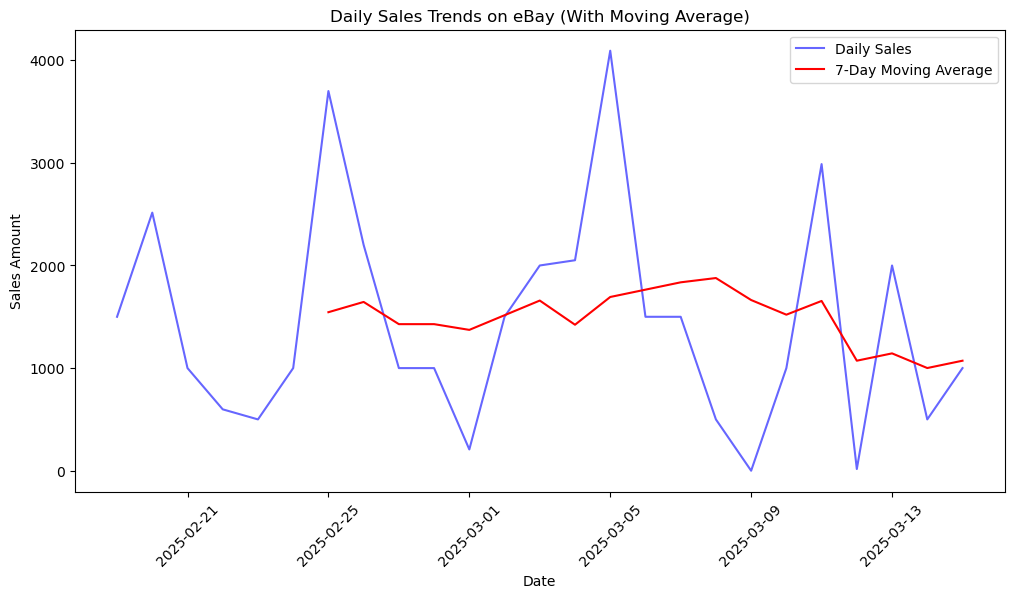

In [9]:
# Plot sales trends with moving average
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['Price'], label="Daily Sales", color='b', alpha=0.6)
plt.plot(daily_sales.index, daily_sales['7-day MA'], label="7-Day Moving Average", color='r')

# Formatting
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.title("Daily Sales Trends on eBay (With Moving Average)")
plt.legend()
plt.xticks(rotation=45)

# Show plot
plt.show()

In [10]:
# Perform trend decomposition
decomposition = seasonal_decompose(daily_sales['Price'], model='additive', period=7)

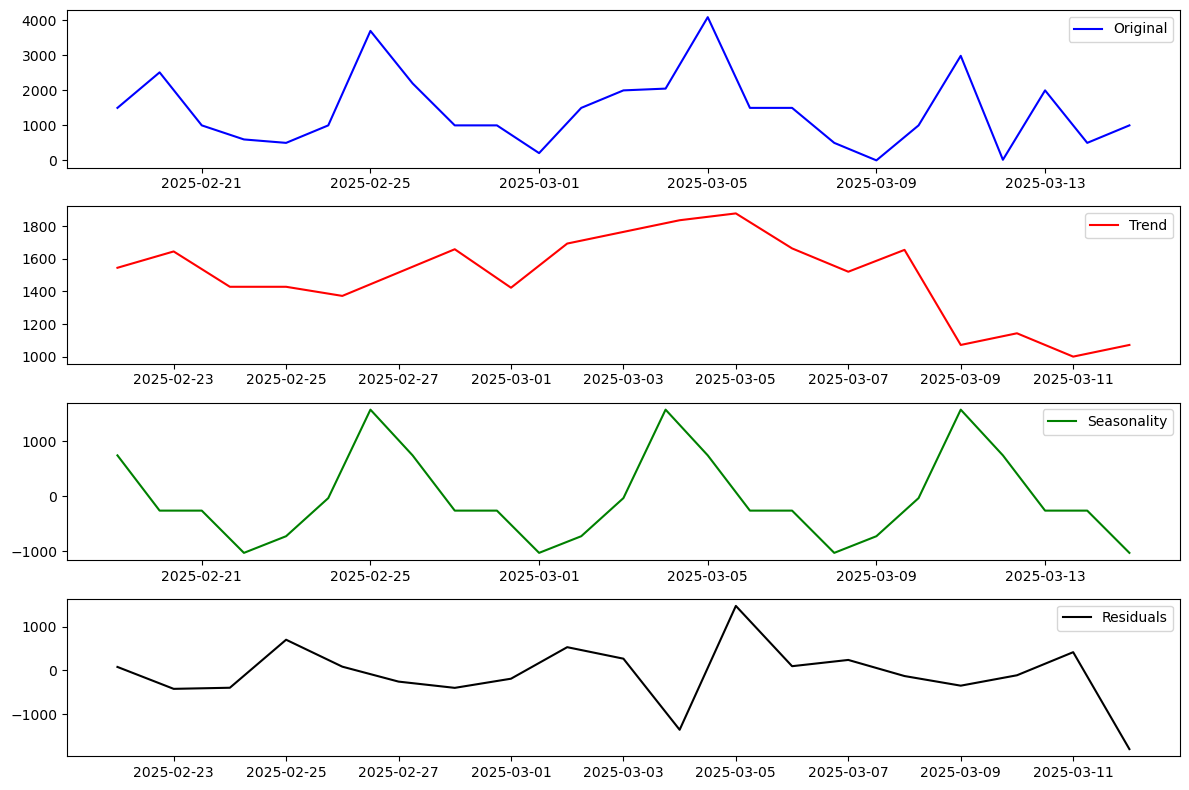

In [11]:
# Plot decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(daily_sales.index, daily_sales['Price'], label='Original', color='b')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(daily_sales.index, decomposition.trend, label='Trend', color='r')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(daily_sales.index, decomposition.seasonal, label='Seasonality', color='g')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(daily_sales.index, decomposition.resid, label='Residuals', color='k')
plt.legend()

plt.tight_layout()
plt.show()